# Lab 3a

In [14]:
import numpy
import sys
import os
import _pickle as cPickle
import gzip


# load the testing set to get the labels
test_labels = cPickle.load(gzip.open('dt2119_lab3_b/dnn_5/context_19_dnn.classify.pickle.gz', 'rb'), encoding='latin1')
print(test_labels.shape)
print(test_labels[0])

(1527014, 64)
[  6.52509730e-30   2.51485820e-32   3.49512410e-29   6.54006633e-33
   1.48915461e-29   4.02832933e-31   2.28431108e-28   6.89304194e-25
   1.28396258e-25   3.28384449e-33   4.43765023e-33   1.22122931e-31
   7.70177218e-29   3.61800278e-21   4.47907846e-24   8.63099968e-29
   4.19407348e-33   1.85396236e-32   2.72673086e-30   2.54154739e-31
   3.47780254e-31   1.42207884e-30   7.07571555e-29   1.03677673e-31
   3.90382923e-33   1.97793852e-31   1.02767968e-29   7.94926879e-33
   7.79739375e-32   3.14174449e-33   3.57146922e-33   1.23137855e-35
   1.00318359e-33   2.01322197e-29   9.50002768e-19   2.17212007e-20
   1.47449697e-31   1.45624546e-28   4.39156504e-29   7.28399844e-25
   2.40977384e-25   5.97172340e-21   1.00000000e+00   8.78778506e-24
   5.99876259e-24   2.79744586e-32   7.88949344e-26   5.18269802e-33
   3.80621333e-31   6.39661664e-28   1.65625708e-34   5.17160980e-33
   6.20913455e-33   1.48859174e-31   2.58291787e-34   1.31129548e-24
   2.42524962e-27   

## compute the Maximum a Posteriori class on a frame-by-frame basis and compare it to the reference transcription (error rate, confusion matrix, . . . )

In [4]:
from dt2119_lab3_b.tools.pfile import pfile_read
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
max_post = numpy.argmax(test_labels, axis=1)

utterance_id, frame_id, features, frame_labels = pfile_read('dt2119_lab3_b/pfiles/normalized__pfiles/test_MFCC_0_D_A_norm.pfile')



#compare frame_labels with max_post to see error 
#np.count_nonzero(max_post - frame_labels)

In [15]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Copied from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
        print("Normalized confusion matrix")
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=45)
    #plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pass
        #plt.text(j, i, cm[i, j],
        #        horizontalalignment="center",
        #       color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.ylabel('True label')
    #plt.xlabel('Predicted label')


Correct classifications:
0.7781068149997316
Normalized confusion matrix
[[  8.19897689e-01   2.56365026e-02   1.29358499e-03 ...,   5.87993179e-05
    0.00000000e+00   1.76397954e-04]
 [  3.89261745e-02   7.96164909e-01   4.46788111e-02 ...,   5.75263663e-04
    0.00000000e+00   0.00000000e+00]
 [  5.82939310e-04   3.01185310e-02   7.13841570e-01 ...,   6.47710344e-04
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  9.67866822e-05   9.67866822e-05   2.90360046e-04 ...,   7.54065041e-01
    4.74254743e-02   1.45180023e-03]
 [  0.00000000e+00   0.00000000e+00   7.86905886e-05 ...,   3.65124331e-02
    8.40415486e-01   2.36071766e-02]
 [  9.21658986e-05   0.00000000e+00   0.00000000e+00 ...,   3.87096774e-03
    3.10599078e-02   8.88940092e-01]]


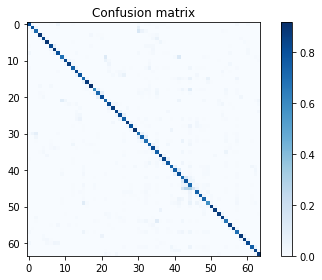

In [16]:
n_labels = test_labels.shape[1]
n_frames = test_labels.shape[0]
confusion_matrix = cm(max_post, frame_labels)
correct_count = 0

for i in range(n_frames):
    if max_post[i] == frame_labels[i][0]:
        correct_count += 1
    #confusion_matrix[max_post[i], frame_labels[i][0]] += 1
print("\nCorrect classifications:")
print(correct_count/n_frames)

plot_confusion_matrix(confusion_matrix, range(n_labels), normalize=True)
plt.show()

## compute the errors on a phoneme basis, that is, after merging states into the corresponding phoneme according to workdir/state2id.lst

0: 17558
1: 10892
2: 15867
3: 9492
4: 18225
5: 14227
6: 21878
7: 45616
8: 28161
9: 7032
10: 4847
11: 7270
12: 15491
13: 26094
14: 15198
15: 34439
16: 16166
17: 11075
18: 8565
19: 9359
20: 10006
21: 8870
22: 13751
23: 8491
24: 14590
25: 20247
26: 24712
27: 8521
28: 9007
29: 7484
30: 30209
31: 26432
32: 34137
33: 24992
34: 40173
35: 45630
36: 22950
37: 18440
38: 23722
39: 17287
40: 22149
41: 48129
42: 140875
43: 176333
44: 114126
45: 10288
46: 24243
47: 13284
48: 18096
49: 15228
50: 10022
51: 11677
52: 10435
53: 21077
54: 21375
55: 20127
56: 13399
57: 24960
58: 7611
59: 9011
60: 11985
61: 10839
62: 13682
63: 10960

Correct classifications:
0.8640451233583974
Normalized confusion matrix
[[  8.18010076e-01   2.79876854e-04   2.08741487e-02   2.33230712e-05
    3.63839910e-03   3.96492210e-04   2.02910719e-03   7.69661349e-04
    1.51599963e-03   2.33230712e-05   1.06050005e-01   1.15215972e-02
    7.97649034e-03   1.39938427e-04   2.23901483e-03   0.00000000e+00
    3.03199925e-04   4.1981

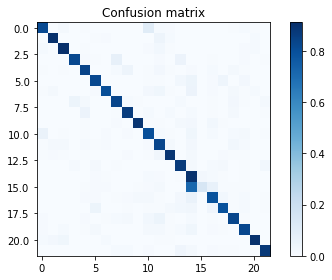

In [17]:
phoneme_mapping = { #mapping from state2id, that is state 2 maps to phoneome 0. State 23 maps to phoneme 7.
    0: 0, 1: 0, 2: 0,
    3: 1, 4: 1, 5: 1,
    6: 2, 7: 2, 8: 2,
    9: 3, 10: 3, 11: 3,
    12: 4, 13: 4, 14: 4,
    15: 5, 16: 5, 17: 5,
    18: 6, 19: 6, 20: 6,
    21: 7, 22: 7, 23: 7,
    24: 8, 25: 8, 26: 8,
    27: 9, 28: 9, 29: 9,
    30: 10, 31: 10, 32: 10,
    33: 11, 34: 11, 35: 11,
    36: 12, 37: 12, 38: 12,
    39: 13, 40: 13, 41: 13,
    42: 14, 43: 14, 44: 14,
    45: 15,
        #print('Confusion matrix, without normalization')
    46: 16, 47: 16, 48: 16,
    49: 17, 50: 17, 51: 17,
    52: 18, 53: 18, 54: 18,
    55: 19, 56: 19, 57: 19,
    58: 20, 59: 20, 60: 20,
    61: 21, 62: 21, 63: 21
}
n_labels = 22
correct_count = 0

for i in range(confusion_matrix.shape[0]):
    print(str(i) + ": " + str(sum(confusion_matrix.T[i])))
    

max_post_phoneme = numpy.zeros((n_frames, 1))
frame_labels_phoneme = numpy.zeros((n_frames, 1))
    
for i in range(n_frames):
    # Combine states representing the same phoneme
    max_post_phoneme[i] = phoneme_mapping[max_post[i]]
    frame_labels_phoneme[i][0] = phoneme_mapping[frame_labels[i][0]]
    
    if max_post_phoneme[i] == frame_labels_phoneme[i][0]:
        correct_count += 1
    # confusion_matrix[max_post[i], frame_labels[i][0]] += 1
    
confusion_matrix = cm(max_post_phoneme, frame_labels_phoneme)

print("\nCorrect classifications:")
print(correct_count/n_frames)
plot_confusion_matrix(confusion_matrix, range(n_labels), normalize=True)
plt.show()
# phenome vs state

# exakt samma som tidigare

	what is the influence of feature kind and size of input context window?

The influence of the feature kind is heavy. We can clearly see that the MFCC features results in a much better classifier. A context window of 5 causes better classification but also increases training time slightly.

-	what is the purpose of normalizing the input feature vectors depending on the activation functions in the network?

To make convergence faster. Better derivative.

-	what is the influence of the number of units per layer and the number of layers?

Number of layers is the number of non-linear abstractions that we can do. The number of units is the number of non-linear combinations available in each layer.

-	what is the influence of the activation function (when you try other activation functions than ReLU, you do not need to reach convergence in case you do not have enough time)

Different activation functions have different properties. ReLU allows us to get faster convergence and a sparser network with fewer neurons required to activate in order to achieve desired results.

-	what is the influence of the learning rate/learning rate strategy. Do you know alternative methods besides the ones implemented in PDNN?

It influences how quickly the weights in the network changes. A higher learning rate lets us avoid local minimas easier but setting it too high causes slow or impossible convergence as we "jump" over the true minimum.

-	how stable are the posteriograms from the network in time?

They seem pretty stable with a steadily decreasing error rate.


-	how do the errors distribute depending on phonetic class?

The errors are fairly evenly distributed except around the sil and sp phonemes.